In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers, optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df=pd.read_csv('dataset/image/label_binary.csv',dtype=str)
df_test=pd.read_csv('dataset/test/label_test.csv',dtype=str)

In [6]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.20)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="dataset/image/",
x_col="file_name",
y_col="label",
subset="training",
batch_size=30,
seed=67,
shuffle=True,
#classes= ['No Tumor','Tumor'],
class_mode="categorical",
target_size=(256,256),
color_mode = "grayscale")

validation_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="dataset/image/",
x_col="file_name",
y_col="label",
subset="validation",
batch_size=30,
seed=67,
shuffle=True,
class_mode="categorical",
#classes= ['No Tumor','Tumor'],
target_size=(256,256),
color_mode = "grayscale")

datagen=ImageDataGenerator(rescale=1./255.)

test=datagen.flow_from_dataframe(
dataframe=df_test,
directory="dataset/test/",
x_col="file_name",
y_col=None,
batch_size=30,
seed=67,
shuffle=False,
class_mode=None,
#classes= ['No Tumor','Tumor'],
target_size=(256,256),
color_mode = "grayscale" )

Found 2392 validated image filenames belonging to 2 classes.
Found 598 validated image filenames belonging to 2 classes.
Found 10 validated image filenames.


In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256,256,1)))
model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
activation_5 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
activation_6 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 64)       

In [20]:
history = model.fit(
        x=train_generator,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=None,
        validation_freq=1,
        max_queue_size=10,
        workers=1,

)

model.save("dataset/model_try_binary.h5",overwrite=True,include_optimizer=True) 

Epoch 1/10
80/80 [==============================] - 123s 2s/step - loss: 0.2244 - accuracy: 0.9093 - val_loss: 0.1832 - val_accuracy: 0.9314
Epoch 2/10
80/80 [==============================] - 119s 1s/step - loss: 0.1819 - accuracy: 0.9239 - val_loss: 0.1733 - val_accuracy: 0.9331
Epoch 3/10
80/80 [==============================] - 119s 1s/step - loss: 0.1362 - accuracy: 0.9507 - val_loss: 0.2906 - val_accuracy: 0.9080
Epoch 4/10
80/80 [==============================] - 127s 2s/step - loss: 0.1152 - accuracy: 0.9624 - val_loss: 0.1331 - val_accuracy: 0.9482
Epoch 5/10
80/80 [==============================] - 123s 2s/step - loss: 0.0862 - accuracy: 0.9691 - val_loss: 0.2030 - val_accuracy: 0.9398
Epoch 6/10
80/80 [==============================] - 121s 2s/step - loss: 0.0666 - accuracy: 0.9770 - val_loss: 0.1328 - val_accuracy: 0.9565
Epoch 7/10
80/80 [==============================] - 121s 2s/step - loss: 0.0496 - accuracy: 0.9837 - val_loss: 0.1461 - val_accuracy: 0.9548
Epoch 8/10
80

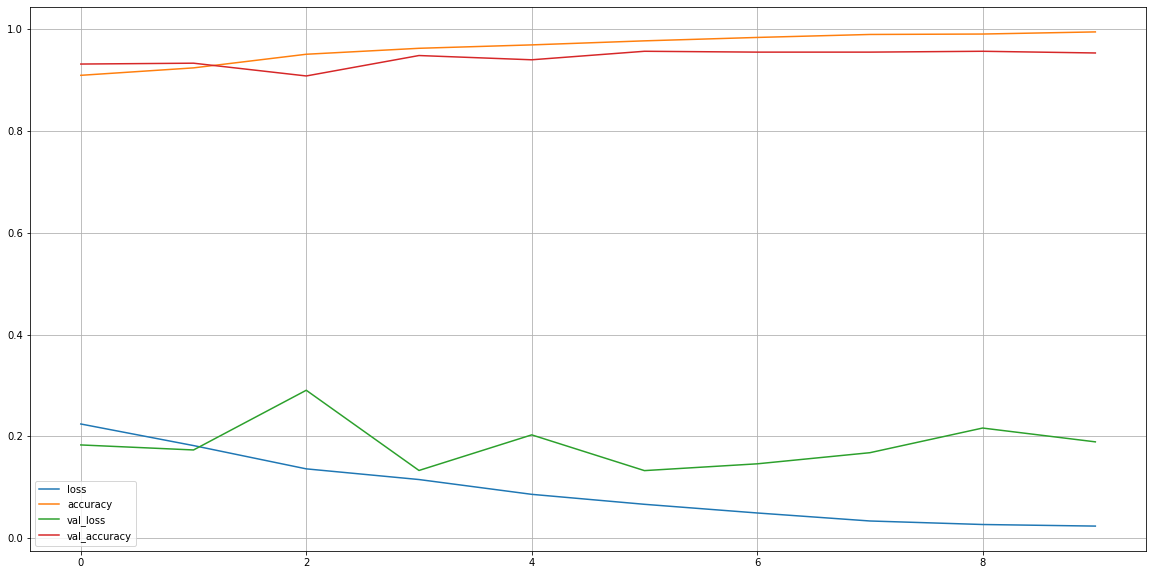

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(20,10))
plt.grid()
plt.show()

In [19]:
model.evaluate(
    x=validation_generator,
    steps = 15
)

15/15 [==============================] - 36s 656ms/step - loss: 0.2138 - accuracy: 0.9578


[0.2137860804796219, 0.9577777981758118]

In [13]:
test_generator = test

#test_generator.reset()
pred=model.predict(test_generator,verbose=1)

print("predictions shape:", pred.shape)

predicted_class_indices=np.argmax(pred,axis=1)

1/1 [==============================] - 18s 18s/step
predictions shape: (10, 2)


In [14]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


In [15]:

filenames=test_generator.filenames
filenames=filenames[:480]
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
#results.to_csv("results.csv",index=False)
print(filenames)
print(len(predictions))
print(results)

['IMAGE_2990.jpg', 'IMAGE_2991.jpg', 'IMAGE_2992.jpg', 'IMAGE_2993.jpg', 'IMAGE_2994.jpg', 'IMAGE_2995.jpg', 'IMAGE_2996.jpg', 'IMAGE_2997.jpg', 'IMAGE_2998.jpg', 'IMAGE_2999.jpg']
10
         Filename Predictions
0  IMAGE_2990.jpg       tumor
1  IMAGE_2991.jpg       tumor
2  IMAGE_2992.jpg       tumor
3  IMAGE_2993.jpg       tumor
4  IMAGE_2994.jpg       tumor
5  IMAGE_2995.jpg       tumor
6  IMAGE_2996.jpg       tumor
7  IMAGE_2997.jpg       tumor
8  IMAGE_2998.jpg       tumor
9  IMAGE_2999.jpg       tumor


In [14]:
IMAGE_2990.jpg	tumor
IMAGE_2991.jpg	tumor
IMAGE_2992.jpg	tumor
IMAGE_2993.jpg	tumor
IMAGE_2994.jpg	tumor
IMAGE_2995.jpg	no_tumor
IMAGE_2996.jpg	tumor
IMAGE_2997.jpg	tumor
IMAGE_2998.jpg	tumor
IMAGE_2999.jpg	tumor



SyntaxError: invalid syntax (<ipython-input-14-239ca439d2f1>, line 1)